In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [233]:
P0 = 1000
R = 0.286
Lv = 2500000
Cp = 1005
T=265

q = 9.5*10**(-3)
Te = T+q*(Lv/Cp)

In [234]:
theta=T*(P0/1000)**(R) 
thetaE = Te*(P0/1000)**(R)

In [235]:
print(q)
print(theta,thetaE)

0.0095
265.0 288.6318407960199


In [37]:
rthetaE = 288.5

In [38]:
rT = rthetaE/((p0/850)**(R)) - q*(Lv/Cp)

In [39]:
print(rT)

251.76542885158153


In [59]:
#from 1000hPa to 900hPa
#theta = 288.5
#qt = 9.5*10^-3

In [ ]:
P = np.array(range(1000,819,-10))

a = P.shape
print(a)
rthetaE = np.zeros(a[0])
qt = np.zeros(a[0])
P0 =  np.zeros(a[0])
rthetaE[:] = 288.5
qt[:] = 9.5*10**-3
P0[:] = 1000

In [299]:
print(P[0:5])
print(P0[0:5])

[1000.          998.18181818  996.36363636  994.54545455  992.72727273]
[1000. 1000. 1000. 1000. 1000.]


In [259]:
P = np.linspace(1000,820,100)

a = P.shape
print(a)
rthetaL = np.zeros(a[0])
qt = np.zeros(a[0])
P0 =  np.zeros(a[0])
rthetaL[:] = 288.5
qt[:] = 9.5*10**-3
for i in range(0,100):
    if P[i]<910:
        rthetaL[i] = 297 + ((910-P[i])/90)*(306-297)
        qt[i] = (4.8*10**-3) -((910-P[i])/90)*(4.8-2.2)*10**-3
P0[:] = 1000
ref_pressure = np.around(P,decimals=-1)

(100,)


([<matplotlib.axis.YTick at 0x25ae58f4a30>,
 [Text(0, 0, '1000.0'),
  Text(0, 0, '970.0'),
  Text(0, 0, '930.0'),
  Text(0, 0, '900.0'),
  Text(0, 0, '870.0'),
  Text(0, 0, '840.0')])

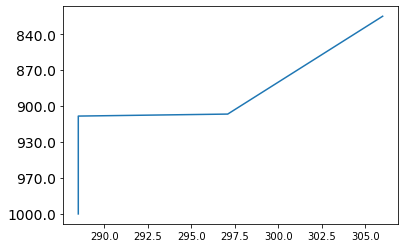

In [249]:
plt.plot(rthetaL,np.arange(0,100))
plt.yticks(np.arange(0,100,step=18), ref_pressure[0:100:18], fontsize=14)

([<matplotlib.axis.YTick at 0x25ae6910430>,
 [Text(0, 0, '1000.0'),
  Text(0, 0, '970.0'),
  Text(0, 0, '930.0'),
  Text(0, 0, '900.0'),
  Text(0, 0, '870.0'),
  Text(0, 0, '840.0')])

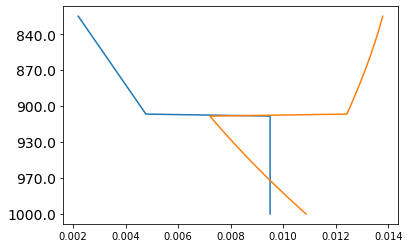

In [252]:
plt.plot(qt,np.arange(0,100))
plt.plot(PE,np.arange(0,100))

plt.yticks(np.arange(0,100,step=18), ref_pressure[0:100:18], fontsize=14)

In [250]:
rT = (rthetaL/((P0/P)**(R))) 

In [240]:
rT = (rthetaE/((P0/P)**(R))) - qt*(Lv/Cp)

In [260]:
E0 = 6.11 
#t = 15
erT = rT-273.15
E = E0*(10**((7.5*erT)/(237+erT)))
PE = 0.622*E/P
#print(erT)
#print(PE)

In [270]:
print(P.shape)
print(P[0:18])
print(qt[0:18]-PE[0:18])
diff = qt-PE

(100,)
[1000.          998.18181818  996.36363636  994.54545455  992.72727273
  990.90909091  989.09090909  987.27272727  985.45454545  983.63636364
  981.81818182  980.          978.18181818  976.36363636  974.54545455
  972.72727273  970.90909091  969.09090909]
[-1.36533712e-03 -1.28054859e-03 -1.19619958e-03 -1.11228915e-03
 -1.02881635e-03 -9.45780259e-04 -8.63179918e-04 -7.81014386e-04
 -6.99282712e-04 -6.17983944e-04 -5.37117126e-04 -4.56681301e-04
 -3.76675507e-04 -2.97098781e-04 -2.17950156e-04 -1.39228663e-04
 -6.09333292e-05  1.69368196e-05]


In [285]:
aa=np.zeros((100))
aa[diff[:]>0] = 1 
print(aa)
add_liq = np.zeros((100))
add_liq[aa>0] = diff[aa>0]
Te = T+q*(Lv/Cp)
thetaE = Te*(P0/1000)**(R)
#print(add_liq)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


([<matplotlib.axis.YTick at 0x25ae69b87f0>,
 [Text(0, 0, '1000.0'),
  Text(0, 0, '970.0'),
  Text(0, 0, '930.0'),
  Text(0, 0, '900.0'),
  Text(0, 0, '870.0'),
  Text(0, 0, '840.0')])

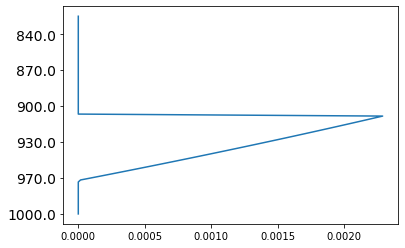

In [277]:
qc = np.zeros((100))
qc[aa>0] = diff[aa>0]
plt.plot(qc,np.arange(0,100))
plt.yticks(np.arange(0,100,step=18), ref_pressure[0:100:18], fontsize=14)

([<matplotlib.axis.YTick at 0x25ae6bad5b0>,
 [Text(0, 0, '1000.0'),
  Text(0, 0, '970.0'),
  Text(0, 0, '930.0'),
  Text(0, 0, '900.0'),
  Text(0, 0, '870.0'),
  Text(0, 0, '840.0')])

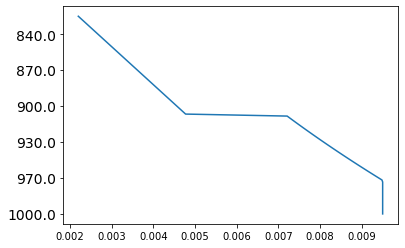

In [283]:
qv=np.zeros(100)
qv[:] = qt[:] - qc[:]
plt.plot(qv,np.arange(0,100))
plt.yticks(np.arange(0,100,step=18), ref_pressure[0:100:18], fontsize=14)

In [297]:
rT1 = (rthetaL/((P0/P)**(R))) 
rT2 = (rthetaL/((P0/P)**(R))) + qc*(Lv/Cp)

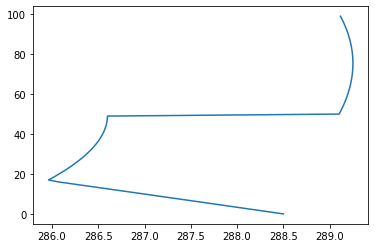

In [298]:
#plt.plot(rT1,np.arange(0,100))
plt.plot(rT2,np.arange(0,100))